<a href="https://colab.research.google.com/github/Sf99-lab/pandas/blob/master/Handling_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

air_quality = pd.read_csv("/content/sample_data/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()


,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [ ]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

***Below is shown how to work with the dates in the column `datetime` as datetime objects instead of plain text?***

In [2]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

air_quality["datetime"]


0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

# **showing start and end date of the time series data set**

In [ ]:
air_quality["datetime"].min(), air_quality["datetime"].max()


('2019-05-07 01:00:00+00:00', '2019-06-21 00:00:00+00:00')

# **Calculate date information**

In [ ]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
time_delta = air_quality["datetime"].max() - air_quality["datetime"].min()
print(time_delta)


44 days 23:00:00


# **add a new column to the DataFrame containing only the month of the measurement**

In [ ]:
air_quality["month"] = air_quality["datetime"].dt.month #this will extract the month from datetime column and add this as new column

air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


# **Calculating average NO2 concentration for each day of the week for each of the measurement locations.**

In [ ]:
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

# **calculate a given statistic (e.g. mean NO2) for each hour of the day.**

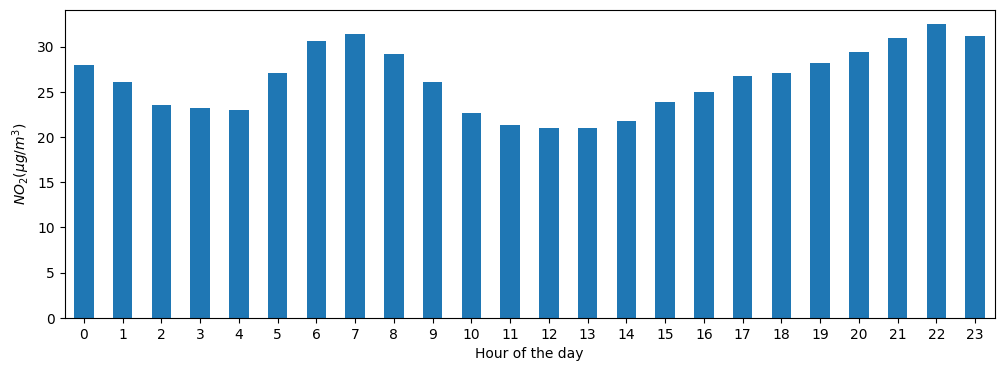

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))

air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)
plt.xlabel("Hour of the day");  # custom x label using Matplotlib

plt.ylabel("$NO_2 (µg/m^3)$");

# **Datetime as index**
Here we use **`pivot()`** **to reshape the data table with each of the measurements locations as a separate column:**

By pivoting the data, the datetime information became the index of the table. In general, setting a column as an index can be achieved by the set_index function.

In [3]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")

no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


**Working with a datetime index (i.e. DatetimeIndex) provides powerful functionalities. For example, we do not need the dt accessor to get the time series properties, but have these properties available on the index directly:**

In [4]:
no_2.index.year, no_2.index.weekday

(Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
        ...
        2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
       dtype='int32', name='datetime', length=1033),
 Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        ...
        3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
       dtype='int32', name='datetime', length=1033))

# Below we create a plot of the `NO2`**values in the different stations from the 20th of May till the end of 21st of May **

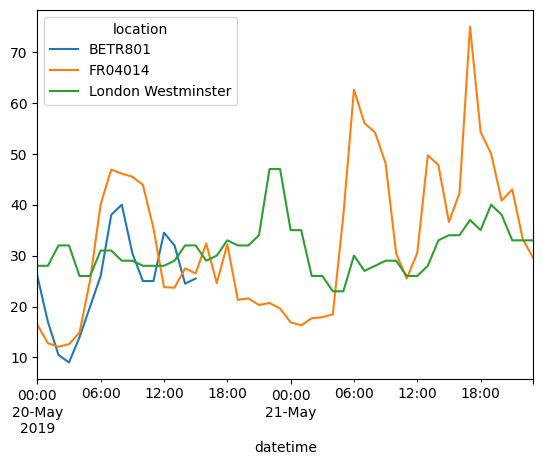

In [5]:
no_2["2019-05-20":"2019-05-21"].plot();